In [138]:
from pymongo import MongoClient, collection
import pandas as pd
import requests
from dotenv import load_dotenv
load_dotenv()

client = MongoClient(
        host=os.environ.get('MONGO_HOST'),
        port=int(os.environ.get('MONGO_PORT')),
        username=os.environ.get('MONGO_USER'),
        password=os.environ.get('MONGO_PASSWORD'),
        maxPoolSize=50)

In [139]:
categories = requests.get('https://www.googleapis.com/youtube/v3/videoCategories?part=snippet&regionCode=DE&key='+os.environ.get('YOUTUBE_API_KEY'))
db = client['youtube_mining']['videos']
df = pd.io.json.json_normalize(db.find())
pd.io.json.json_normalize(df.loc[5,'likes'])

,version,date,value
0,1,03/03/2021 20:50:36,41495
1,2,03/03/2021 20:53:51,41511
2,3,03/03/2021 20:54:51,41517
3,4,03/03/2021 23:40:44,42129
4,5,03/03/2021 23:58:33,42175
5,6,04/03/2021 00:07:35,42195


In [140]:
cat_df = pd.DataFrame(pd.io.json.json_normalize(categories.json().get('items')))
cat_df['id'] = cat_df['id'].astype(int)

df = df.merge(cat_df[['id','snippet.title']], how='left', left_on='category', right_on='id').drop('id',axis=1)

In [141]:
amount = df.groupby(['snippet.title']).size().sort_values().to_frame('COUNT')

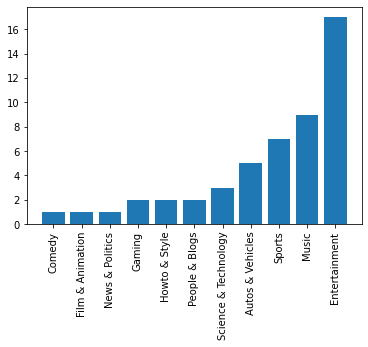

In [142]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
ax.bar(amount.index, amount['COUNT'])
plt.xticks(rotation=90)
plt.show()